<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_Lab%E2%84%964/ML_Matvei_ReducingTheDimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Описание датасета

species - вид рабы

length - длина рыбы

weight - масса рыбы

w_l_ratio( Weight / Length) - коэффициент отношения массы к длине рыбы

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
sns.set()
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/fish_data.csv")
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


# Анализ и нормализация данных

In [ ]:
data.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


In [ ]:
data.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [ ]:
vals = data['species'].unique()
vals

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [ ]:
len(vals) # всего 9 видов рыб в датасете

9

In [ ]:
df = pd.DataFrame(data)

# создаём копию
df_copy = df.copy()
df_copy['species'] = df_copy['species'].replace(vals, [0, 1, 2, 3, 4, 5, 6, 7, 8])


df_new = df.drop('species', axis = 1)

<ipython-input-126-ddb8e1c839e8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['species'] = df_copy['species'].replace(vals, [0, 1, 2, 3, 4, 5, 6, 7, 8])


In [ ]:
# нормализация данных

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df_new)
data = pd.DataFrame(normalized_df, columns=df_new.columns)
data.head()

,length,weight,w_l_ratio
0,0.156364,0.330189,0.428571
1,0.020000,0.287736,0.696429
2,0.073455,0.332547,0.589286
3,0.044000,0.308962,0.642857
4,0.162545,0.313679,0.410714


In [ ]:
# Создание нового датсета

data['species'] = df_copy['species']
data

,length,weight,w_l_ratio,species
0,0.156364,0.330189,0.428571,0
1,0.020000,0.287736,0.696429,0
2,0.073455,0.332547,0.589286,0
3,0.044000,0.308962,0.642857,0
4,0.162545,0.313679,0.410714,0
...,...,...,...,...
4075,0.880000,0.959906,0.214286,8
4076,0.847273,0.957547,0.232143,8
4077,0.961818,0.990566,0.196429,8
4078,0.851636,0.957547,0.232143,8


# Понижение размерности (Dimensionality Reduction)

In [ ]:
X = data.drop('species', axis = 1)
y = data['species']

# Метод главных компонентов (Principal Component Analysis, PCA)

PCA — это метод на основе проекций, который часто используется для уменьшения размерности больших наборов данных путем преобразования большого набора переменных в меньший, который по-прежнему содержит большую часть информации о большом наборе.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

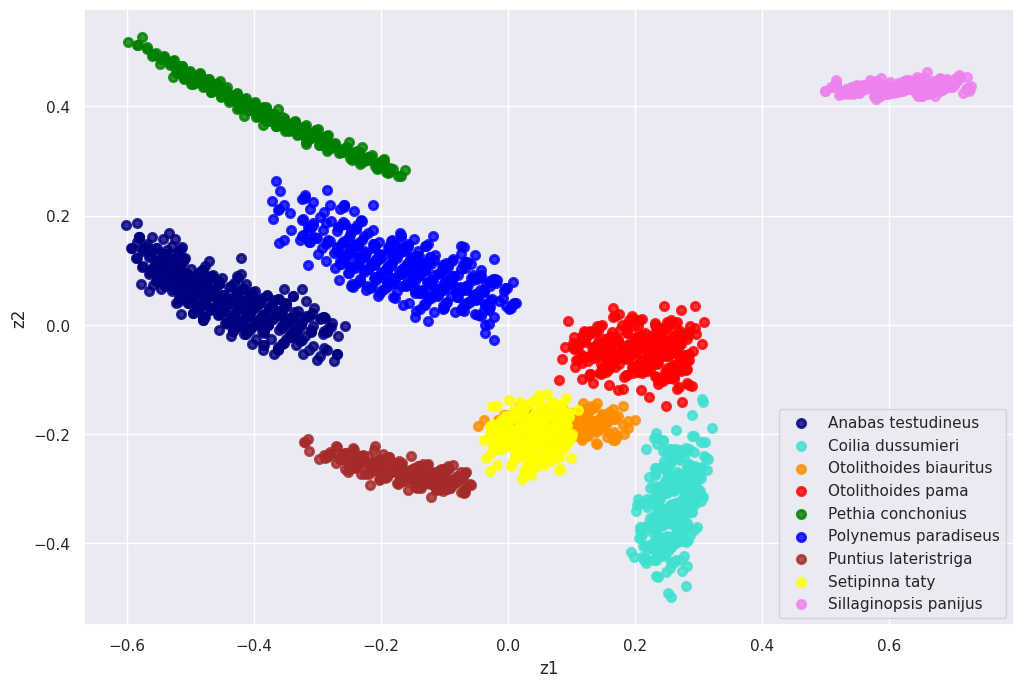

In [ ]:


pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", 'red', 'green', 'blue', 'brown', 'yellow', 'violet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4 , 5, 6, 7, 8], vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Очень полезной функцией для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio

In [ ]:
pca.explained_variance_ratio_

array([0.59628048, 0.39201897])

Можно заметить, что первый главные компоненты сохраняют 59.6% дисперсии,тогда как вторые главные компоненты сохраняют только 39,2% дисперсии.Это указывает на то, что мы, скорее всего, получим хороший результат, если еще больше уменьшим размерность до 1D.

# Независисый анализ компонентов (Independent Component Analysis, ICA)

ICA — это метод снижения размерности, аналогичный PCA в том смысле, что он берет набор признаков и создает другой набор, который полезен в некотором роде.

Но в то время как PCA пытается максимизировать дисперсию, ICA предполагает, что признаки представляют собой смеси независимых источников, и он пытается изолировать эти независимые источники, которые смешаны в наборе данных.

Мотивация ICA заключается в том, чтобы взять исходный набор признаков и попытаться определить те из них, которые вносят независимый вклад в набор данных, другими словами, те, которые имеют наименьшую корреляцию с другими признаками. Поэтому он изолирует эти наиболее важные компоненты. Эта проблема называется слепой изоляцией источника.**

In [ ]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

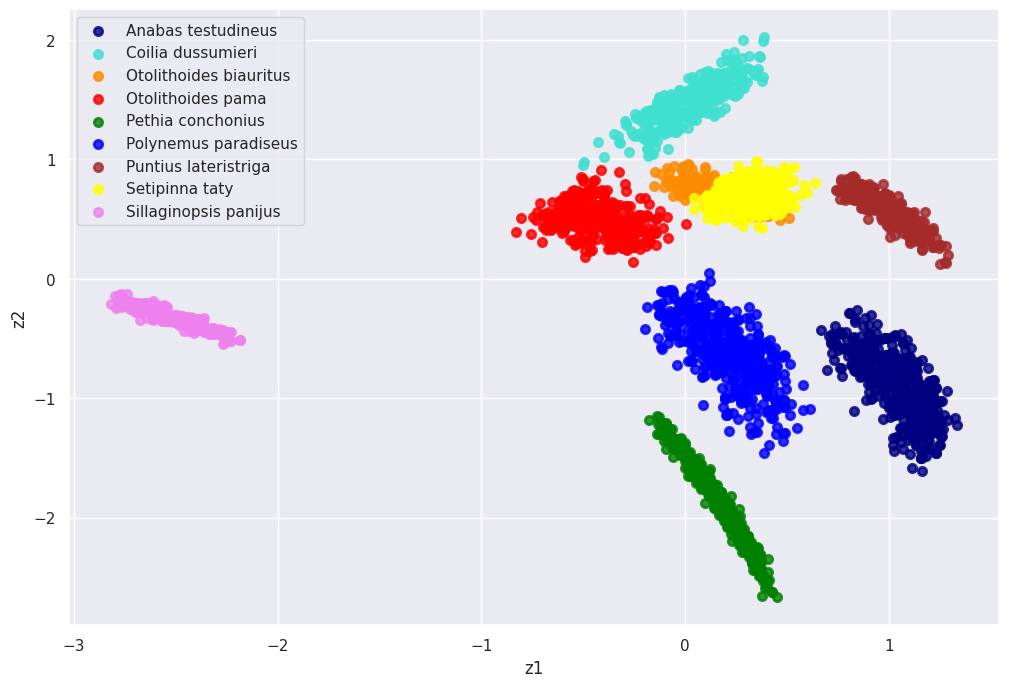

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", 'red', 'green', 'blue', 'brown', 'yellow', 'violet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4 , 5, 6, 7, 8], vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Нелинейные методы уменьшения размерности

# Kernel PCA (ядерный PCA)

Дело в том, что PCA по своей природе является подходом линейного снижения размерности. Если у нас есть нелинейный набор данных, то PCA может не справиться с уменьшением его размерности.

К счастью, есть так называемый трюк ядра, который мы можем применить к алгоритму PCA, как вы видели в алгоритмах машины опорных векторов.

Этот трюк ядра позволяет нам использовать PCA для выполнения нелинейных проекций для снижения размерности, и этот метод называется ядерным PCA. Существует несколько ядер, которые мы можем реализовать с помощью PCA, например, линейное ядро, ядро ​​RBF и сигмоидальное ядро.

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

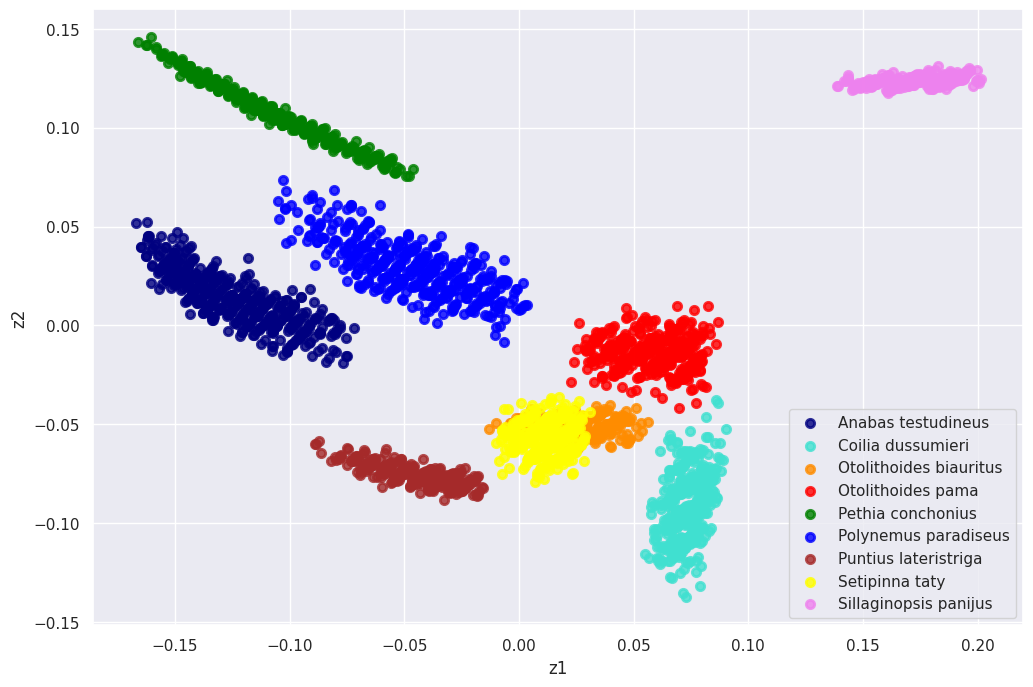

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", 'red', 'green', 'blue', 'brown', 'yellow', 'violet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8], vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.59628048, 0.39201897])

# tSNE((t-distributed Stochastic Neighbor Embedding, tSNE)) или (t-распределенное стохастическое вложение соседей)

t-SNE начинается с определения сходства точек на основе расстояний между ними. Близлежащие точки считаются похожими, в то время как удаленные считаются непохожими.

Для этого измеряются расстояния между интересующей точкой и другими точками, после чего они помещаются на нормальную кривую. Такие измерения проделываются для каждой точки с применением некоторого масштабирования для учета различий в плотности различных секций.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=50)
X_new = tsne.fit_transform(X)

In [ ]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (4080, 3)
New Shape of X:  (4080, 2)
Kullback-Leibler divergence after optimization:  0.3162129521369934
No. of iterations:  999


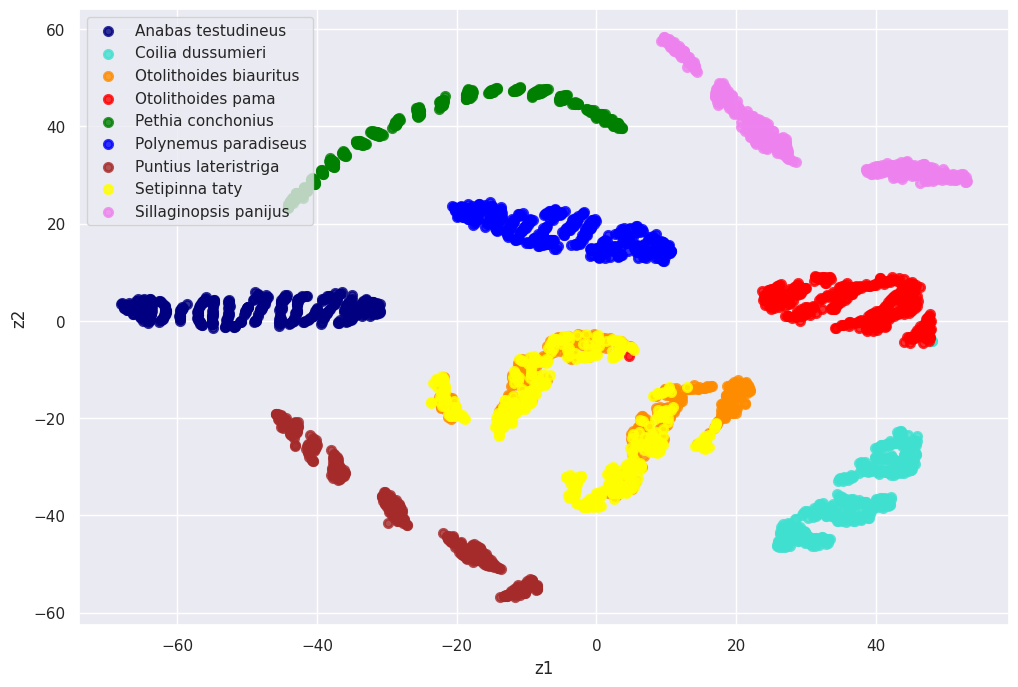

In [ ]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", 'red', 'green', 'blue', 'brown', 'yellow', 'violet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8], vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN(Density-Based Spatial Clustering of Applications with Noise - Пространственная кластеризация приложений с шумом на основе плотности)



DBSCAN — это алгоритм кластеризации на основе плотности, который предполагает, что кластеры — это плотные области в пространстве, разделенные областями с более низкой плотностью точек данных. Здесь «плотно сгруппированные» точки данных объединяются в один кластер. Мы можем идентифицировать кластеры в больших наборах данных, наблюдая за локальной плотностью точек данных.

Уникальной особенностью кластеризации DBSCAN является то, что она устойчива к выбросам, благодаря чему находит применение в системах обнаружения аномалий. Кроме того, он не требует ввода количества кластеров, в отличие от K-Means, где нам приходится вручную указывать количество центроидов.

Ключевые характеристики алгоритма DBSCAN

Не требуется количество кластеров в качестве входных данных.
Он может обнаруживать выбросы при нахождении кластеров.
Алгоритм DBSCAN может обнаруживать кластеры сложной или случайной формы и размера.

## DBSCAN для кластеризации

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [ ]:
dbscan_cluster1 = DBSCAN(eps = 0.01, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [ ]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 147
Estimated no. of noise points: 247
v_measure = 0.6120559940824304


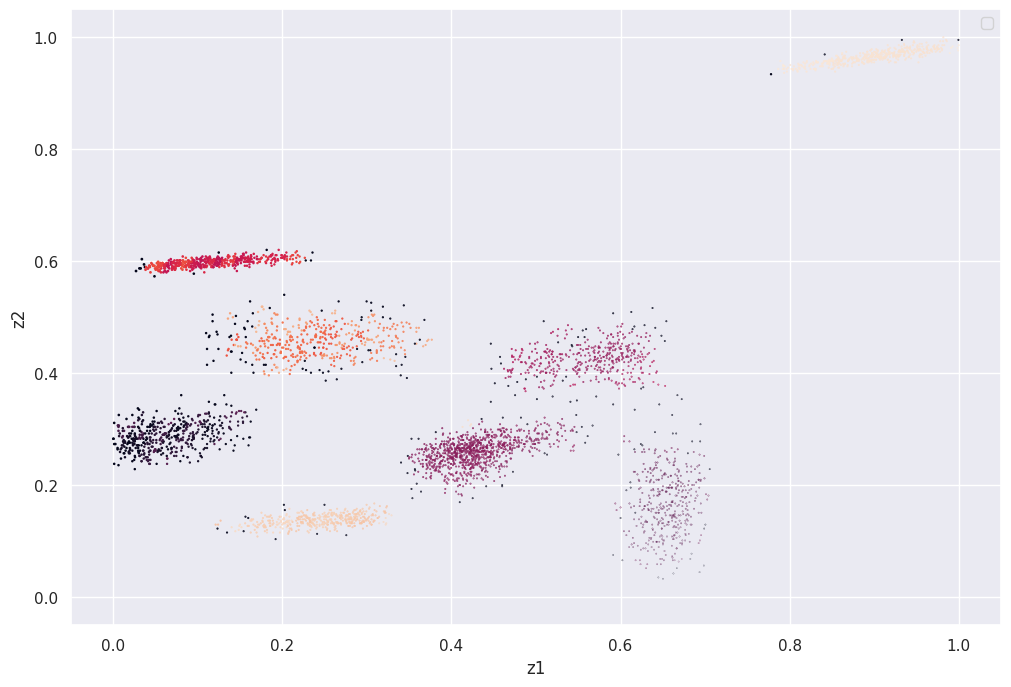

In [ ]:
cols = ['length',	'weight',	'w_l_ratio'] #название столбцов

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange", 'red', 'green', 'blue', 'brown', 'yellow', 'violet']
lw = 2

plt.scatter(
        X[cols[0]], X[cols[1]], X[cols[2]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [ ]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

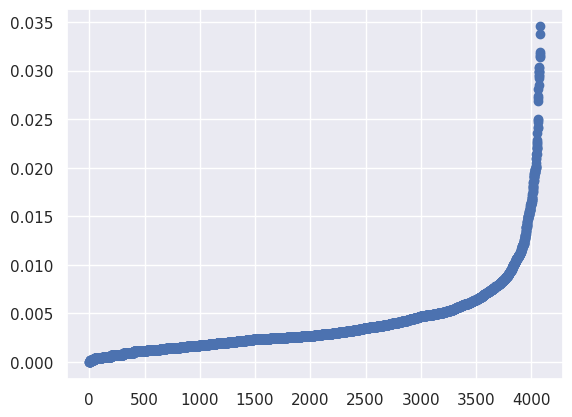

In [ ]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [ ]:
dbscan = DBSCAN(eps = 0.01, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=0.01, min_samples=3)


In [ ]:
pred = dbscan.fit_predict(X)

In [ ]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 147
Estimated no. of noise points: 247
v_measure = 0.6120559940824304


In [ ]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

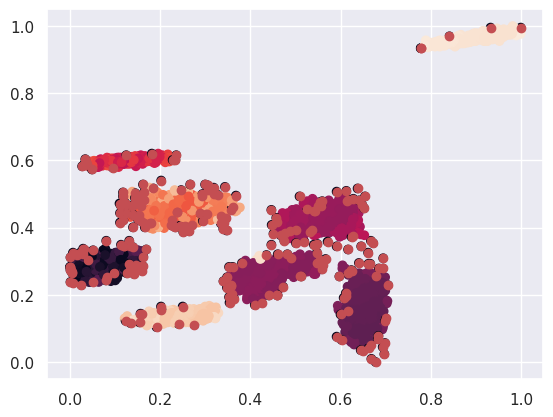

In [ ]:
plt.scatter( X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r')
plt.show()